# Rank

### 1 rank

In [12]:
import numpy as np
tensor_1d = np.array([1.3,1,4.0,23.69])
print tensor_1d

[  1.3    1.     4.    23.69]


In [3]:
print tensor_1d[0]

1.3


In [4]:
print tensor_1d[2]

4.0


In [5]:
## tensor rank
tensor_1d.ndim

1

In [6]:
## tensor shape
tensor_1d.shape

(4,)

In [7]:
tensor_1d.dtype

dtype('float64')

In [11]:
## Transfor the Numpy into Tensorflow tensor
import tensorflow as tf

tf_tensor = tf.convert_to_tensor(tensor_1d,dtype = tf.float64)

with tf.Session() as sess:
    print sess.run(tf_tensor)
    print sess.run(tf_tensor[0])
    print sess.run(tf_tensor[2])
    

[  1.3    1.     4.    23.69]
1.3
4.0


### 2 rank

In [13]:
import numpy as np
tensor_2d = np.array([(1,1,4,23),(2,3,4,5),(5,6,7,8),(10,11,12,13)])
print tensor_2d

[[ 1  1  4 23]
 [ 2  3  4  5]
 [ 5  6  7  8]
 [10 11 12 13]]


In [18]:
tensor_2d[2][1]

6

In [20]:
tensor_2d[0:2,0:2]

array([[1, 1],
       [2, 3]])

In [32]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype="int32")
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype="int32")

print "matrix1 ="
print matrix1

print "matrix2 ="
print matrix2

matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

matrix_product = tf.matmul(matrix1,matrix2)
matrix_sum = tf.add(matrix1,matrix2)
matrix_3 = np.array([(2,7,2),(1,4,2),(9,0,2)],dtype="float32")
print "matrix3 ="
print matrix_3

matrix_det = tf.matrix_determinant(matrix_3)

with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)
    
print "matrix1*matrix2 ="
print result1

print "matrix1+matrix2 ="
print result2

print "matrix3 determinant result ="
print result3

matrix1 =
[[2 2 2]
 [2 2 2]
 [2 2 2]]
matrix2 =
[[1 1 1]
 [1 1 1]
 [1 1 1]]
matrix3 =
[[ 2.  7.  2.]
 [ 1.  4.  2.]
 [ 9.  0.  2.]]
matrix1*matrix2 =
[[6 6 6]
 [6 6 6]
 [6 6 6]]
matrix1+matrix2 =
[[3 3 3]
 [3 3 3]
 [3 3 3]]
matrix3 determinant result =
56.0


### 3rank

In [40]:
tensor_3d = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print tensor_3d

tensor_3d.shape

#tensor_3d[plane,row,col]
print tensor_3d[0,0,0]
print tensor_3d[0,0,1]
print tensor_3d[0,1,0]
print tensor_3d[0,1,1]


[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
1
2
3
4


# Graph

###### You can chick this: http://mirlab.org/jang/books/matlabProgramming4beginner/19-4_imageReadAndWrite.asp?title=19-4%20%BCv%B9%B3%C0%C9%AE%D7%AA%BA%C5%AA%A8%FA%BBP%BCg%A4J


In [84]:
import matplotlib.image as mp_image
filename = "PacktLogo.jpg"
input_image = mp_image.imread(filename)

print "input dim = {}".format(input_image.ndim)
print "input shape = {}".format(input_image.shape)


AttributeError: __exit__

# fractals

In [53]:
x = 5. + 4j
print x

x = complex(5,4)
print x

(5+4j)
(5+4j)


In [54]:
x.real ## real number

5.0

In [55]:
x.imag ## imaginary number

4.0

### Mandelbrot set
###### Z(n+1) = Z(n)^2 + c ,where Z(0) = 0

### Step
###### Step1: init = 0 >> Z(0) = 0
###### Step2: The horizontal axis means real part ; The vertical axis means imaginary part 
###### Step3: Repeated iterative recursive function : Z(n+1) = Z(n)^2 + c

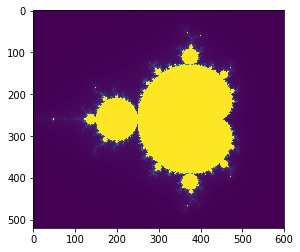

In [66]:
## Prepare dataSet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Y,X = np.mgrid[-1.3:1.3:0.005,-2:1:0.005]
Z = X + 1j * Y
C = tf.constant(Z.astype(np.complex64))

zs = tf.Variable(C)
ns = tf.Variable(tf.zeros_like(C,tf.float32))

## startup
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

zs_=zs*zs+C
not_diverged = tf.complex_abs(zs_)<4
step = tf.group(zs.assign(zs_),ns.assign_add(tf.cast(not_diverged,tf.float32)))
for i in range(200):
    step.run()
    
plt.imshow(ns.eval())
plt.show()


### Julia Set

###### Z(n+1) = Z(n)^2 - c ,where Z(0) = 0

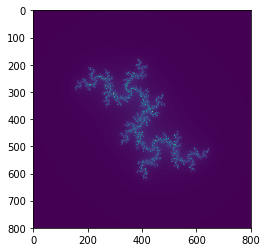

In [65]:
## Prepare dataSet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Y,X = np.mgrid[-2:2:0.005,-2:2:0.005]
Z = X + 1j * Y

## redefine Z
Z = tf.constant(Z.astype("complex64"))

zs = tf.Variable(Z)
ns = tf.Variable(tf.zeros_like(Z,tf.float32))

## startup
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
C = complex(0.0,0.75)
zs_=zs*zs-C
not_diverged = tf.complex_abs(zs_) < 4
step = tf.group(zs.assign(zs_),ns.assign_add(tf.cast(not_diverged,tf.float32)))
for i in range(200):
    step.run()
    
plt.imshow(ns.eval())
plt.show()


In [67]:
np.mgrid[-2:2:0.005,-2:2:0.005]

array([[[-2.   , -2.   , -2.   , ..., -2.   , -2.   , -2.   ],
        [-1.995, -1.995, -1.995, ..., -1.995, -1.995, -1.995],
        [-1.99 , -1.99 , -1.99 , ..., -1.99 , -1.99 , -1.99 ],
        ..., 
        [ 1.985,  1.985,  1.985, ...,  1.985,  1.985,  1.985],
        [ 1.99 ,  1.99 ,  1.99 , ...,  1.99 ,  1.99 ,  1.99 ],
        [ 1.995,  1.995,  1.995, ...,  1.995,  1.995,  1.995]],

       [[-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        ..., 
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995],
        [-2.   , -1.995, -1.99 , ...,  1.985,  1.99 ,  1.995]]])

In [83]:
Y,X = np.mgrid[-2:2:0.005,-2:2:0.005]
Z = X + 1j * Y

## redefine Z
print Z
print type(Z)
print Z.astype("complex64")
print type(Z)

[[-2.000-2.j    -1.995-2.j    -1.990-2.j    ...,  1.985-2.j     1.990-2.j
   1.995-2.j   ]
 [-2.000-1.995j -1.995-1.995j -1.990-1.995j ...,  1.985-1.995j
   1.990-1.995j  1.995-1.995j]
 [-2.000-1.99j  -1.995-1.99j  -1.990-1.99j  ...,  1.985-1.99j   1.990-1.99j
   1.995-1.99j ]
 ..., 
 [-2.000+1.985j -1.995+1.985j -1.990+1.985j ...,  1.985+1.985j
   1.990+1.985j  1.995+1.985j]
 [-2.000+1.99j  -1.995+1.99j  -1.990+1.99j  ...,  1.985+1.99j   1.990+1.99j
   1.995+1.99j ]
 [-2.000+1.995j -1.995+1.995j -1.990+1.995j ...,  1.985+1.995j
   1.990+1.995j  1.995+1.995j]]
<type 'numpy.ndarray'>
[[-2.00000000-2.j         -1.99500000-2.j         -1.99000001-2.j         ...,
   1.98500001-2.j          1.99000001-2.j          1.99500000-2.j        ]
 [-2.00000000-1.995j      -1.99500000-1.995j      -1.99000001-1.995j      ...,
   1.98500001-1.995j       1.99000001-1.995j       1.99500000-1.995j     ]
 [-2.00000000-1.99000001j -1.99500000-1.99000001j -1.99000001-1.99000001j
  ...,  1.98500001-1.9900000